In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

from scipy.stats import describe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
all_files = glob.glob("../../Large_output/good_submission/*.csv") 
scores = np.zeros(len(all_files))
for i in range(len(all_files)):
    scores[i] = float('.'+all_files[i].split(".")[5])

In [20]:
all_files

['../../Large_output/good_submission/cat_1.074.csv',
 '../../Large_output/good_submission/xgb_new_noM_1.084.csv',
 '../../Large_output/good_submission/lgb3_1.089.csv',
 '../../Large_output/good_submission/lgb3_1.082.csv',
 '../../Large_output/good_submission/nn_clean_1.100.csv',
 '../../Large_output/good_submission/cat_clean_1.082.csv',
 '../../Large_output/good_submission/xgb_bayes_clean_1.114.csv',
 '../../Large_output/good_submission/lgbm_site0_1.074.csv',
 '../../Large_output/good_submission/xgb_new_csv_month_1.087.csv',
 '../../Large_output/good_submission/lgb3_1.086.csv',
 '../../Large_output/good_submission/lgb3_no_site0_1.084.csv',
 '../../Large_output/good_submission/lgb3_1.081.csv',
 '../../Large_output/good_submission/lgb5_reclean_1.078.csv']

In [21]:
scores

array([0.074, 0.084, 0.089, 0.082, 0.1  , 0.082, 0.114, 0.074, 0.087,
       0.086, 0.084, 0.081, 0.078])

In [22]:
top = scores.argsort()
for i, f in enumerate(top):
    print(i,scores[f],all_files[f])

0 0.074 ../../Large_output/good_submission/cat_1.074.csv
1 0.074 ../../Large_output/good_submission/lgbm_site0_1.074.csv
2 0.078 ../../Large_output/good_submission/lgb5_reclean_1.078.csv
3 0.081 ../../Large_output/good_submission/lgb3_1.081.csv
4 0.082 ../../Large_output/good_submission/lgb3_1.082.csv
5 0.082 ../../Large_output/good_submission/cat_clean_1.082.csv
6 0.084 ../../Large_output/good_submission/xgb_new_noM_1.084.csv
7 0.084 ../../Large_output/good_submission/lgb3_no_site0_1.084.csv
8 0.086 ../../Large_output/good_submission/lgb3_1.086.csv
9 0.087 ../../Large_output/good_submission/xgb_new_csv_month_1.087.csv
10 0.089 ../../Large_output/good_submission/lgb3_1.089.csv
11 0.1 ../../Large_output/good_submission/nn_clean_1.100.csv
12 0.114 ../../Large_output/good_submission/xgb_bayes_clean_1.114.csv


In [23]:
outs = [pd.read_csv(all_files[f], index_col=0) for f in top]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "m" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols

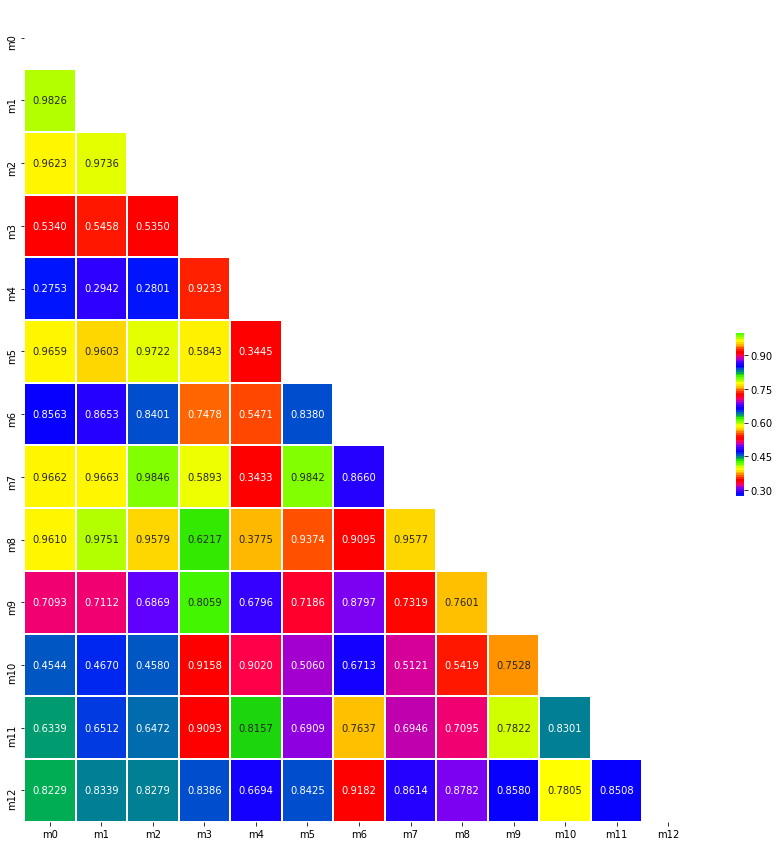

In [24]:
# check correlation
corr = concat_sub.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(len(cols)+2, len(cols)+2))

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr,mask=mask,cmap='prism',center=0, linewidths=1,
                annot=True,fmt='.4f', cbar_kws={"shrink":.2})